# Importing the Libraries

In [1]:
import pandas as pd

# Importing the Database

In [2]:
data = pd.read_csv('heart.csv')

# Taking Care of Missing Values

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Taking Care of Duplicate Values

In [6]:
data_dup = data.duplicated().any()

In [7]:
data_dup

True

In [8]:
data = data.drop_duplicates()

In [9]:
data_dup = data.duplicated().any()
data_dup

False

# Data Processing

In [10]:
# select numerical value or catergarical values
cate_val =[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
    


In [11]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [12]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Encording categorical data

In [13]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [15]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val, drop_first = True) #covert to binary

In [16]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [17]:
cate_val


['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [18]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


# Feature Scaling

In [19]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [22]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


# Splitting the dataset into the training set and test set

In [23]:
x = data.drop('target',axis=1) #get independent variables

In [24]:
x

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [25]:
y = data['target']

In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# make two set for testing and traning
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42) #among data, 0.2% take for the test set
# get random values

In [29]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [30]:
x_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


# Trains Data set using different methods

# 1. Logistic regression

In [31]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log = LogisticRegression()
log.fit(x_train,y_train) #data train using fit method

LogisticRegression()

In [34]:
y_pred1 =log.predict(x_test) #predict using test data

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score (y_test,y_pred1)

0.7868852459016393

# 2. SVC

In [37]:
from sklearn import svm

In [38]:
svm = svm.SVC()

In [39]:
svm.fit(x_train,y_train)

SVC()

In [40]:
y_pred2 = svm.predict(x_test) #predict data for test set

In [41]:
accuracy_score(y_test,y_pred2) #check accurancy 

0.8032786885245902

# 3.KNeighbors Classifier

In [54]:
import numpy as np


In [55]:
from  sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier()
x_test = pd.DataFrame(x_test, columns=x_train.columns)


In [74]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [77]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Assuming x_test is a pandas DataFrame
x_test = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Ensure memory layout is contiguous
if not x_test.flags['C_CONTIGUOUS']:
    x_test = np.ascontiguousarray(x_test)

# Create a new KNN model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Make predictions
y_pred3 = knn.predict(x_test)

# Assuming x_test is a pandas DataFrame
x_test = x_test.values if isinstance(x_test, pd.DataFrame) else x_test

# Ensure memory layout is contiguous
if not x_test.flags['C_CONTIGUOUS']:
    x_test = np.ascontiguousarray(x_test)

# Pass feature names to x_test
x_test_with_feature_names = pd.DataFrame(x_test, columns=x_train.columns)

# Make predictions
y_pred3 = knn.predict(x_test_with_feature_names)



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [78]:
import sys
print(sys.path)

['C:\\Users\\user\\MachineLearning\\HeartMeasurements', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\user\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:/Users/user/AppData/Roaming/Python/Python311/site-packages']


In [51]:
import sys
sys.path.append("C:/Users/user/AppData/Roaming/Python/Python311/site-packages")

In [72]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [81]:
# check chnaging classifier defult value for accurancy
score=[]

for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWa

In [82]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [84]:
# according to the above data k=2 is give high accuracy
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8032786885245902

# 4.Non Linear ML Algorithm

In [85]:
 # preposition not requred

In [102]:
data = pd.read_csv('heart.csv')

In [103]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [104]:
data = data.drop_duplicates()

In [105]:
data.shape

(302, 14)

In [106]:
x = data.drop('target',axis=1)
y=data['target']

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [108]:
y_pred4 = dt.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7049180327868853

# 5.Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier

In [110]:
dt = DecisionTreeClassifier()

In [111]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [112]:
y_pred5 = dt.predict(x_test)

In [113]:
accuracy_score(y_test,y_pred5)

0.7049180327868853

# 6. Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf = RandomForestClassifier()

In [116]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [117]:
y_pred6 =rf.predict(x_test)

In [118]:
accuracy_score(y_test,y_pred6)

0.8360655737704918

# 7.Gradient Boosting Classifier


In [120]:
from sklearn.ensemble import GradientBoostingClassifier

In [122]:
gbc = GradientBoostingClassifier()

In [123]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [124]:
y_perd7 = gbc.predict(x_test)

In [127]:
accuracy_score(y_test,y_perd7)

0.8032786885245902

# Compare all the models

In [139]:
final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'DT', 'RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6),
        accuracy_score(y_test, y_perd7)  # Fix the typo here
    ]
})


In [141]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,DT,0.704918
3,RF,0.836066
4,GB,0.803279


In [142]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

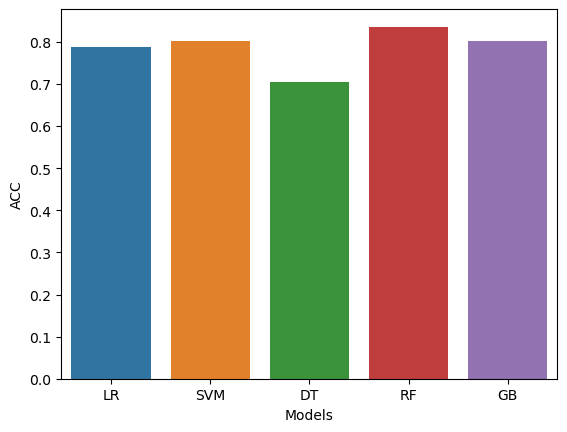

In [144]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [145]:
x = data.drop('target',axis=1)
y=data['target']

In [146]:
x.shape

(302, 13)

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
rf= RandomForestClassifier()

In [150]:
rf.fit(x,y)

RandomForestClassifier()

# prediction on new data

In [151]:
import pandas as pd

In [152]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,   
},index = [0])

In [153]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [155]:
p = rf.predict(new_data)
if p[0] ==0:
    print("No Disease")
else:
    print("Disease")
    

No Disease


# Save Model Usign Joblib

In [156]:
import joblib

In [157]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [158]:
model = joblib.load('model_joblib_heart')

In [160]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

In [161]:
from tkinter import *
import joblib

In [162]:

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
